# Session 1: Oneway

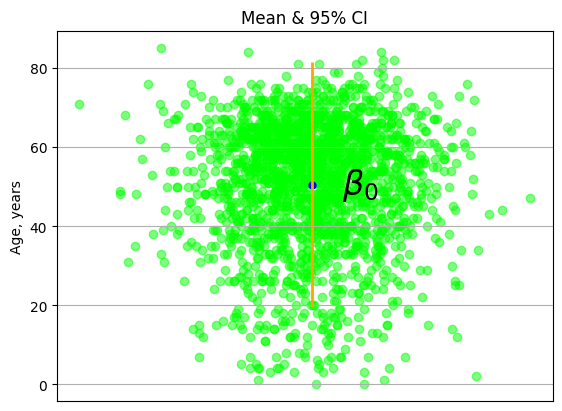

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import io 

# Load the data from the URL using requests
url = 'https://raw.githubusercontent.com/jhustata/livre/main/transplants.txt'
response = requests.get(url)
content = response.content.decode('utf-8')
file = io.StringIO(content)
data = pd.read_csv(file, sep='\t')

# Extract relevant columns
age = data['age']
x = [1] * len(age)

# Calculate mean and standard deviation
mean_age = age.mean()
std_age = age.std()

# Calculate upper and lower bounds for 95% confidence interval
ub = mean_age + std_age * 1.96
lb = mean_age - std_age * 1.96

# Add jitter to x-axis values
#x_jitter = x + np.random.normal(0, 0.02, size=len(x))

# Add jitter to x-axis values centered around 1
x_jitter = 1 + np.random.normal(0, 0.02, size=len(age))


# Scatter plot of age with increased jitter
plt.scatter(x_jitter, age, c='lime', alpha=0.5)

# Mean point
plt.scatter(1, mean_age, c='blue', s=25)

# Confidence interval with thicker line
plt.errorbar(1, mean_age, yerr=[[mean_age - lb], [ub - mean_age]], color='orange', linewidth=2)

# Styling
plt.ylabel('Age, years')
plt.title('Mean & 95% CI')
plt.text(1.01, mean_age, r'$\beta_0$', va='center', fontsize=24)
plt.xticks([])
plt.grid(True)

# Save the figure
plt.savefig('age_m_95ci.png')
plt.show()

 
1. **Output Explanation:** You could add the explanation in Python comments or in a Markdown cell (if you're using Jupyter notebooks):  

The scatter plot visualizes the distribution of the 'age' variable in the dataset. Each point corresponds to one data entry. The blue dot represents the mean age value. The orange lines above and below the mean represent the 95% confidence interval for the mean age. This means that we are 95% confident that the true mean age lies within this interval.  
  
2. **Hands-On Exercises:** Here are some exercises to help you master the concepts introduced:  

Exercise 1: Try using a different dataset and apply the same analysis. What differences do you notice in the distribution and the mean?  

Exercise 2: Experiment with different levels of jitter. How does changing the jitter affect the visualization?  

Exercise 3: Calculate the confidence interval at a different confidence level, such as 90% or 99%. How does this change the interval?  


